# Projeto 2 - Ciência dos Dados

### Turma A

**Membros:**
-
+ Alessandra Yumi Carvalho Ogawa
+ André Brito
+ Arthur Cisotto Machado
+ Camila Bernardi Moniz


### Importando as Bibliotecas Necessárias para a execução do trabalho

In [3]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats 
import itertools
import plotly.express as px
import seaborn as sns
import numpy as np
import os
import re
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_validate
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.preprocessing import label_binarize
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import plot_tree

## A. Introdução  
A teoria da comunicação possui raízes clássicas na história das idéias.Se a filosofia tradicionalmente debate a produção do conhecimento humano da realidade, a teoria da comunicação dedica-se à mídia, modalidades e mensagens em que humanos trocam, refletem e ordenam diferentes perspectivas dessa realidade. Revisando certas questões epistemológicas, éticas e políticas, enquanto responde à crescente influência da informação e tecnologias da comunicação na sociedade e na cultura no século XX.A primeira rede social surgiu em 1995 nos Estados Unidos e Canadá, chamada Classmates, com o objetivo de conectar estudantes da faculdade.A partir de então, as redes sociais tomaram espaço na vida das pessoas facilitando a comunicação social e reduzindo distâncias kilométricas a um único "click".Entretanto, apesar dos benefícios, a expansão das redes sociais colaborou com o crescimento de "fake news" e criou os chamados "perfis fakes", perfis usados na Internet que ocultam a identidade real de um usuário.Entre outros, a popularização da criação desses tipos de perfis, seja para marketing, anonimidade ou fã clubes, instigou a criação de ferramentas para desvendar as pessoas ou grupos por trás das telas, assim as investigações vão da especialização de detetives virtuais até a criação  de programas de TV como "Catfish: The Show", um programa que se dedica a analisar o mundo dos relacionamentos virtuais repletos de ilusões e mentiras causados por um "Catfish", o qual é um termo usado para se referir a pessoas que criam perfis falsos na Internet para enganar usuários emocionalmente e/ou financeiramente.


<img src= "img/instagram3.png" widht= "500" height="500" >

A rede Instagram foi criado em 6 de outubro de 2010 por Kevin Systrom e pelo brasileiro Mike Krieger em 2010. E em pouco tempo tornou-se um destaque na App Store.Atualmente, segundo estatísticas da Shopify o Brasil tem cerca de 99 milhões de usuários ativos no Instagram e em 2020 bateu a marca de 1 bilhão de usuários ativos mundialmente.
Assim, com um crescimento exponencial de acessos, o Instagram também sofreu com o aumento de contas fakes. Nesse contexto, com o intuito de detectar e distinguir os diferentes tipo de usuários fakes na rede Instagram, os alunos de Cdados da turma A se propuseram a responder a seguinte pergunta: seria possível prever se um usuário é "fake" ($target$) e, ainda, classifica-lo dentre tipos específicos de usuários fake (spam,inativos e ativos) , a partir de uma análise de suas características ($features$)?.
Para esse objetivo contamos com uma vasta gama de dados de usuários do Instagram e esperamos encontrar uma maneira de revelar a realidade por trás dos perfis, o qual no fim será posta a prova a partir de uma série de testes de acurácia em cima do modelo preditivo.

<img src="img/fake.png" widht="500" height="500">

## B. Minerando Dados e Características do Dataset  

Nesta área do projeto nós faremos a análise exploratória do dados, avaliando a correlação entre as _features_ e elas mesmas e em seguida entre as _features_ e a _target_. 

### Importando o Dataset

In [4]:
data = pd.read_csv('user_fake_authentic_4class.csv')
data.head(10)

,pos,flw,flg,bl,pic,lin,cl,cz,ni,erl,erc,lt,hc,pr,fo,cs,pi,class
0,69,541,440,293,1,0,223,0.000000,0.111,10.120000,0.50,0.944,0.556,0.0,0.000,0.107055,334.596802,r
1,9,783,803,76,1,0,101,0.000000,0.000,19.820000,1.99,0.889,0.222,0.0,0.000,0.007400,2137.979248,r
2,390,1200,925,103,1,0,723,0.000000,0.000,11.540000,0.76,1.000,2.389,0.0,0.000,0.221954,96.244957,r
3,138,1100,1000,40,1,0,24,0.166667,0.167,20.440001,1.61,0.833,0.111,0.0,0.000,0.025055,226.622437,r
4,1,228,487,84,1,0,30,0.000000,0.000,9.210000,1.75,1.000,0.000,0.0,0.000,0.000000,0.000000,r
5,17,358,298,374,1,0,122,0.000000,0.176,20.510000,1.20,0.824,0.824,0.0,0.000,0.029504,1249.813965,r
6,25,1100,1400,16,1,0,68,0.000000,0.111,9.120000,0.71,0.778,0.667,0.0,0.056,0.013411,1088.083862,r
7,77,259,2800,15,1,0,9,0.500000,0.000,13.730000,0.86,0.833,0.000,0.0,0.000,0.235294,159.321838,r
8,16,157,226,233,1,0,10,0.125000,0.000,24.920000,1.27,0.875,0.000,0.0,0.063,0.000000,1160.965820,r
9,195,717,475,118,1,0,14,0.444444,0.056,9.950000,0.96,0.944,0.111,0.0,0.000,0.191383,847.155212,r


### Legenda do Dataset:  
Explicação do significado de cada uma das _features_.

In [5]:
d1 = {'Nome da Variável': ['pos','flw', 'flg', 'bl', 'pic', 'lin', 'cl','cz','ni','erl', 'erc', 'lt', 'hc', 'pr', 'fo', 'cs', 'pi', 'class'], 'Nome da Feature': ['Número de posts', 'Número de seguidores', 'Número contas seguindo', 'Tamanho da Biografia', 'Disponibilidade de Foto', 'Disponibilidade de Link', 'Tamanho médio da Legenda', 'Legenda Zero', 'Porcentagem Sem Imagem', 'Taxa de Engajamento (Like)', 'Taxa de Engajamento (Comentário)', 'Porcentagem de Localização', 'Média de uso de Hashtags', 'Palavras-Chave Promocionais', 'Palavras-Chave Seguidores', 'Similaridade por Cosseno', 'Intervalo de Posts', 'Classe de Usuários'], 'Descrição': ['Número total de posts que o usuário já fez', 'Número de seguidores', 'Número de contas que o usuário segue', 'Número de caracteres da biografia do usuário', 'Valor 0 se o usuário não tem foto de perfil, 1 caso contrário', 'Valor 0 se o usuário não tem Link externo no perfil, 1 caso contrário', 'Número médio de caracteres nas legendas dos posts do usuário', 'Porcentagem (0.0 a 1.0) de legendas que possuem quase 0 (<=3) caracteres', 'Porcentagem (0.0 a 1.0) de posts que não são do tipo imagem (Existem 3 tipos de mídia em um post no Instagram, imagem, vídeo e carrosel)', 'Número de Likes dividido pelo Número de Seguidores', 'Número de Comentários dividiodo pelo Número de Seguidores', 'Porcentagem (0.0 a 1.0) de posts com tag de localização', 'Número médio de hashtags usadas em um post', 'Número médio de palavras-chave promocionais em hashtags (por exemplo, regrann, contest, repost, giveaway, mention, share, give away, quiz, etc)', 'Número médio de palavras-chave procurando seguidores em hashtags (por exemplo, follow, like, folback, follback, f4f, etc)', 'Medida da similaridade de entre dois vetores (posts) num espaço vetorial que avalia o valor do cosseno do ângulo compreendido entre eles.', 'Intervalo de tempo médio entre posts (em horas)', 'Classes 2-class: r (usuários reais/autenticados), f (Usuário fake / Comprou seguidores) | Classes 4-class: r (usuários reais/autenticados), a (Usuário fake Ativo), i (Usuário fake Inativo), s (Usuário fake Spam). Note que as 3 classes de usuário fake (a, i, s) foram determinadas por avaliadores humanos.' ]}
df1 = pd.DataFrame(data=d1)
pd.set_option('display.max_colwidth', None)
df1.style.hide_index()


Nome da Variável,Nome da Feature,Descrição
pos,Número de posts,Número total de posts que o usuário já fez
flw,Número de seguidores,Número de seguidores
flg,Número contas seguindo,Número de contas que o usuário segue
bl,Tamanho da Biografia,Número de caracteres da biografia do usuário
pic,Disponibilidade de Foto,"Valor 0 se o usuário não tem foto de perfil, 1 caso contrário"
lin,Disponibilidade de Link,"Valor 0 se o usuário não tem Link externo no perfil, 1 caso contrário"
cl,Tamanho médio da Legenda,Número médio de caracteres nas legendas dos posts do usuário
cz,Legenda Zero,Porcentagem (0.0 a 1.0) de legendas que possuem quase 0 (<=3) caracteres
ni,Porcentagem Sem Imagem,"Porcentagem (0.0 a 1.0) de posts que não são do tipo imagem (Existem 3 tipos de mídia em um post no Instagram, imagem, vídeo e carrosel)"
erl,Taxa de Engajamento (Like),Número de Likes dividido pelo Número de Seguidores


## Análise Exploratória

### Correlação entre as _features_:

In [6]:
data.corr()

,pos,flw,flg,bl,pic,lin,cl,cz,ni,erl,erc,lt,hc,pr,fo,cs,pi
pos,1.000000,0.166695,0.038562,0.141610,0.055275,0.139939,0.191024,-0.063103,0.064128,-0.024753,-0.029045,0.025164,0.011754,0.027358,-0.009527,-0.028462,-0.070077
flw,0.166695,1.000000,0.008143,0.048008,0.013466,0.060522,0.042617,-0.022574,0.024401,-0.006315,-0.007753,0.020658,0.009011,-0.000612,-0.001073,-0.018352,-0.009618
flg,0.038562,0.008143,1.000000,0.031344,-0.117024,0.015255,-0.106933,0.165158,-0.098679,0.033867,-0.005908,-0.093101,-0.038603,-0.076363,0.016669,0.195926,-0.051608
bl,0.141610,0.048008,0.031344,1.000000,0.166773,0.366875,0.295858,-0.212018,0.121772,-0.025033,-0.034935,0.218418,0.165403,-0.017546,0.031489,-0.167572,-0.065453
pic,0.055275,0.013466,-0.117024,0.166773,1.000000,0.091341,0.132968,0.113378,0.145210,-0.015730,-0.016664,0.133094,0.066943,0.033606,0.005830,-0.285706,0.105846
lin,0.139939,0.060522,0.015255,0.366875,0.091341,1.000000,0.239230,-0.141152,0.068616,-0.025193,-0.032901,0.147633,0.087192,-0.019877,0.009055,-0.078826,-0.047884
cl,0.191024,0.042617,-0.106933,0.295858,0.132968,0.239230,1.000000,-0.342882,0.088381,-0.034115,-0.037111,0.061298,0.191118,0.262864,0.071502,-0.158918,-0.075580
cz,-0.063103,-0.022574,0.165158,-0.212018,0.113378,-0.141152,-0.342882,1.000000,-0.094043,0.075819,0.078008,-0.171646,-0.202589,-0.080290,-0.054557,0.270140,0.065315
ni,0.064128,0.024401,-0.098679,0.121772,0.145210,0.068616,0.088381,-0.094043,1.000000,-0.017700,-0.018242,0.210334,0.055417,-0.024935,-0.005014,-0.273763,0.038901
erl,-0.024753,-0.006315,0.033867,-0.025033,-0.015730,-0.025193,-0.034115,0.075819,-0.017700,1.000000,0.440497,-0.009019,0.027886,-0.006053,0.033943,-0.036677,-0.002977


Procurando melhorar a visualização das correlações, compusemos uma matriz de correlação que funciona como o crosstab visto acimas, só que possibilitando uma melhor percepção visual dos diferentes níveis de correlação entre si. A partir de diferentes níveis de colorimento e tonalização consegue-se perceber as variadas correlações entre as _features_ do _dataset_.

In [7]:
x=data.corr()
lista = x.values.tolist()
fig = px.imshow(lista,  labels=dict(x="Features", y="Features", color="Correlação"),
                x=['pos', 'flw', 'flg', 'bl', 'pic', 'lin', 'cl', 'cz', 'ni', 'erl', 'erc', 'lt', 'hc', 'pr', 'fo', 'cs', 'pi'],
                y=['pos', 'flw', 'flg', 'bl', 'pic', 'lin', 'cl', 'cz', 'ni', 'erl', 'erc', 'lt', 'hc', 'pr', 'fo', 'cs', 'pi'],
                zmax = 1, zmin = -1, title = "Correlação entre Features")
fig.show()

Achando as maiores e menores correlações:

In [8]:
lista_corrs = list(itertools.chain(*lista))

lista_corrs_sem_1 = list(filter(lambda x: x != 1 and x != -1, lista_corrs))

maximo = max(lista_corrs_sem_1)
minimo = min(lista_corrs_sem_1)

print(f"A maior correlação é {maximo}")
print(f"A menor correlação é {minimo}")

A maior correlação é 0.44049679787453194
A menor correlação é -0.3428821083645762


Como pode-se observar na célula de cima as maiores e menores correlações não são suficiente significativas a ponto de se destacarem de certo modo. Por isso, conclui-se que não será possível o descarte de nenhuma _feature_.

**Considerando-se que uma correlação só poderia ser considerada forte quando acima de 0.8.**

### Relação entre a variável _target_ ('Class') e as _features_:

Abaixo apresenta-se a análise exploratória feita para descobrir como as _features se relacionam com a _target_ que seria a classificação do perfil de um usuário.

Separando cada uma das calssificações possíveis em variáveis diferentes:

In [9]:
perfis_reais = data.loc[data['class']=='r']
perfis_fake_ativo = data.loc[data['class']=='a']
perfis_fake_inativo = data.loc[data['class']=='i']
perfis_fake_spam = data.loc[data['class']=='s']

Para a realização da análise exploratória plotamos dois tipos de gráficos: 
+ **_bloxplot_**: nos possibilitou a identificação da mediana das distribuições assim como os _outliers_ dentro da mesma;  
+ **Histograma**: nos possibilitou melhor verificação visual das _features_ que influenciam mais ou menos a classificação dos usuários;  

**Observação:** em muitos dos histogramas à seguir foi utilizado algum tipo de limite para os eixos Y e X, procurando ter melhor visualização da distribuição de densidade. O estabelecimento de limites foram nescessários em muitos casos vistos que as classificações de usuários se diferem muito entre si, o que contribuiu para a aparição de alguns _outliers_ dificultando a interpretação visual dos gráficos. Além disso para algumas _features_ foi plotado um gráfico diferente dados que essas categorias permitiam apenas duas classificações (0,1) representando informações como "contém"/"não contém" por exemplo. Para isso dividiu-se duas vezes a classificação: primeiro em variáveis que amazenasse apenas a classificação 0 e 1, e depois dividiu-se em 4 outras variáveis que indicariam a quantidade de ususários classificados dessa maneira dentro de cada classe.

### Funções para facilitar a plotagem dos gráficos e organização do código

In [10]:
def box_plot(feature):
    plt.figure(figsize=(25,25))
    plt.figure(figsize=(25,25))
    data.boxplot(column=feature,by="class")
    plt.tight_layout()
    plt.show()


In [11]:
def histograma(feature,eixo_x,eixo_y,titulo,x_lim = 0  ,y_lim = 0):
    fig = plt.figure(figsize=(15, 7))
    perfis_reais[feature].plot.hist(color=('crimson'), alpha=0.6, density=True)
    perfis_fake_ativo[feature].plot.hist(color=('midnightblue'), alpha=0.6, density=True)
    perfis_fake_inativo[feature].plot.hist(color=('lime'), alpha=0.6, density=True)
    perfis_fake_spam[feature].plot.hist(color=('yellow'), alpha=0.6, density=True)
    plt.legend(['r', 'a', 'i', 's'])
    if x_lim != 0:
        plt.xlim(x_lim)
    if y_lim != 0:
        plt.ylim(y_lim)
    plt.xlabel(eixo_x)
    plt.ylabel(eixo_y)
    plt.title(titulo)
    plt.show()
    

+ #### Relação entre Class e Número de posts	

<Figure size 1800x1800 with 0 Axes>

<Figure size 1800x1800 with 0 Axes>

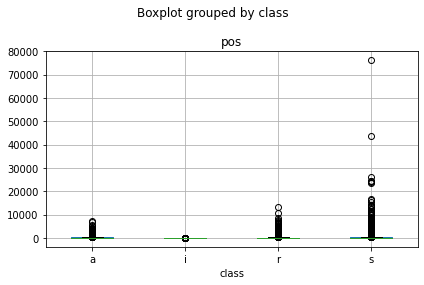

In [12]:
box_plot('pos')

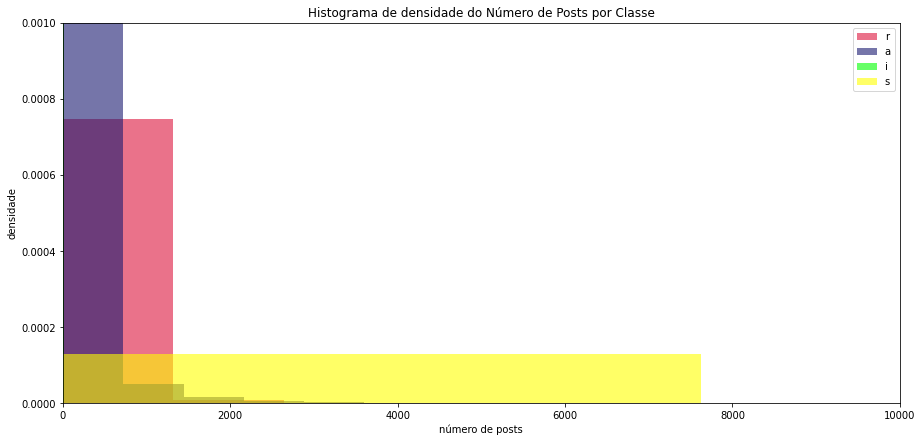

In [13]:
histograma('pos','número de posts','densidade','Histograma de densidade do Número de Posts por Classe',(0,10000),(0,0.001))

Em relação a _feature_ posts (POS) muito pode-se concluir do histograma. Fica claro por contraste visual que usuários que possuem uma extrema quantidade de posts, com grande probabilidade serão classificados como _spam_; o que já era de se esperar do comportamento desse tipo de usuário de Instagram. Outro ponto de muito destaque, é a concentração de usuários inativos na área que representa uma quantidade baixíssima de poasts; comportamento também esperado por esse tipo de usuário.

+ #### Relação entre Class e Número de seguidores (FLW):

<Figure size 1800x1800 with 0 Axes>

<Figure size 1800x1800 with 0 Axes>

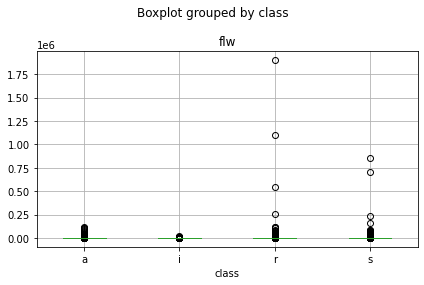

In [14]:
box_plot('flw')

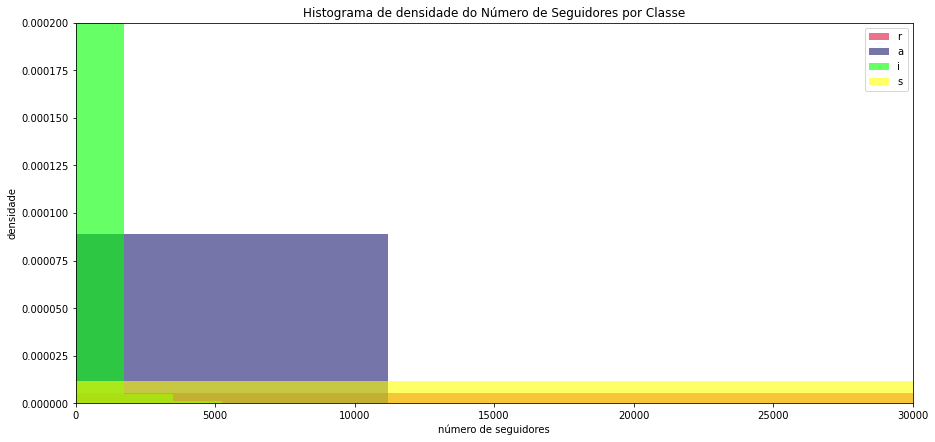

In [15]:
histograma('flw','número de seguidores','densidade','Histograma de densidade do Número de Seguidores por Classe',(0,30000),(0,0.0002))

Em relação a _feature_ número de seguidores (FLW) verifica-se que tanto os usuários spam quanto os reais apresentam um comportamento similar, o que pode apresentar uma complicação na hora de classificar futuramente demais usuários. Apesar disso, verifica-se comportamentos distintos para usuários inativos e ativos fake; comportamentos esperados dada as características de atividade desses usuários.

+ #### Relação entre Class e Número contas seguindo (FLG):

<Figure size 1800x1800 with 0 Axes>

<Figure size 1800x1800 with 0 Axes>

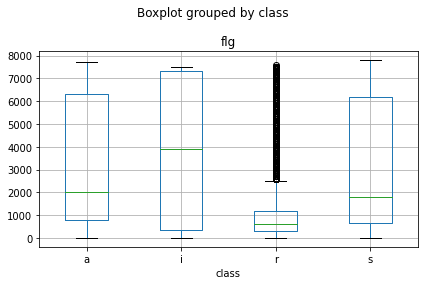

In [16]:
box_plot('flg')

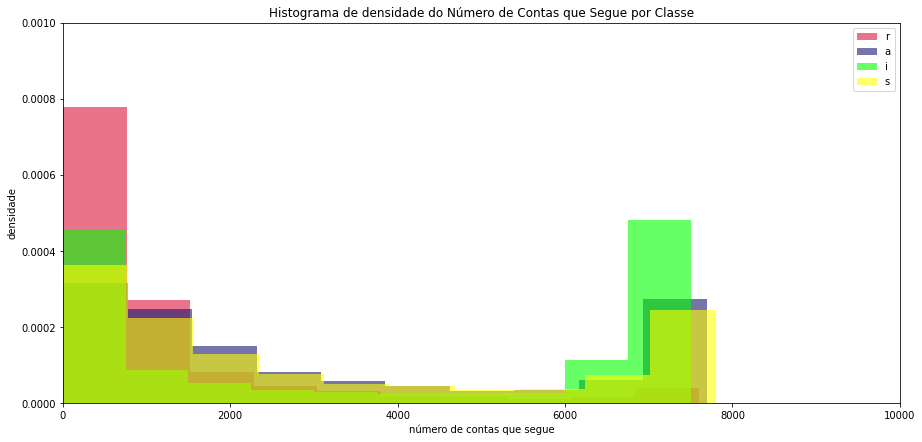

In [17]:
histograma('flg','número de contas que segue','densidade','Histograma de densidade do Número de Contas que Segue por Classe',(0,10000),(0,0.001))

Analisando o primeiro gráfico a respeito da _feature_ número de contas seguindo (FLG) percebe-se que as medianas (representadas pela linha horizontal verde) são diferentes para cada uma das classificações. Isso leva a concluir que a faixa de número de seguidores em que uma conta de Instagram se classificar será importante para a classificação final de tipo de usuário.

+ #### Relação Class e Tamanho da Biografia	(BL):

<Figure size 1800x1800 with 0 Axes>

<Figure size 1800x1800 with 0 Axes>

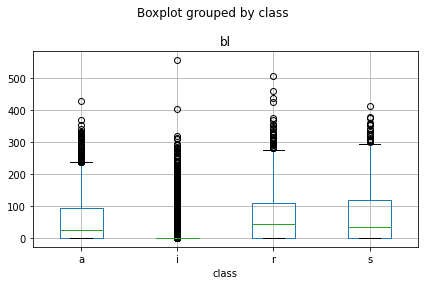

In [18]:
box_plot('bl')

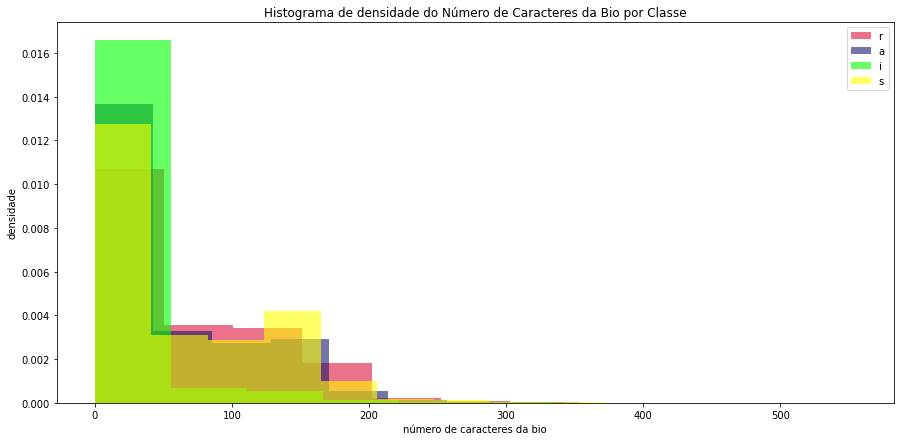

In [19]:
histograma('bl','número de caracteres da bio','densidade','Histograma de densidade do Número de Caracteres da Bio por Classe')   


A _feature_ tamanho da biografia (BL) não parece ser um elemento decisivo na classificação, dada a proximidade de suas medianas observadas no primeiro gráfico. Apesar disso, observando o histograma fica claro que há certa diferença de concentração entre as classificações, porém nada muito decisivo por se tratarem de _outliers_.

+ #### Relação Class e Disponibilidade de Foto (PIC):

In [20]:
perfis_sem_foto = data.loc[data['pic']== 0]
perfis_com_foto = data.loc[data['pic']== 1]

perfis_reais_com_foto = perfis_com_foto.loc[perfis_com_foto['class']=='r']
perfis_fake_ativo_com_foto = perfis_com_foto.loc[perfis_com_foto['class']=='a']
perfis_fake_inativo_com_foto = perfis_com_foto.loc[perfis_com_foto['class']=='i']
perfis_fake_spam_com_foto = perfis_com_foto.loc[perfis_com_foto['class']=='s']

perfis_reais_sem_foto = perfis_sem_foto.loc[perfis_sem_foto['class']=='r']
perfis_fake_ativo_sem_foto = perfis_sem_foto.loc[perfis_sem_foto['class']=='a']
perfis_fake_inativo_sem_foto = perfis_sem_foto.loc[perfis_sem_foto['class']=='i']
perfis_fake_spam_sem_foto = perfis_sem_foto.loc[perfis_sem_foto['class']=='s']

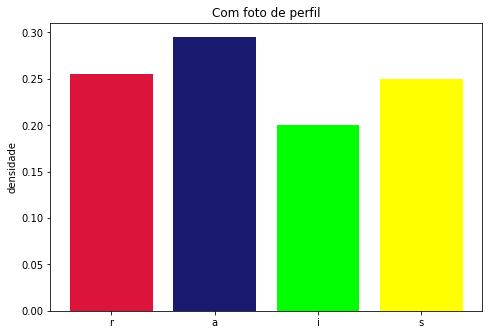

In [21]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
perfis = ['r', 'a', 'i', 's']
quantidade = [perfis_reais_com_foto.shape[0]/perfis_com_foto.shape[0], perfis_fake_ativo_com_foto.shape[0]/perfis_com_foto.shape[0], perfis_fake_inativo_com_foto.shape[0]/perfis_com_foto.shape[0], perfis_fake_spam_com_foto.shape[0]/perfis_com_foto.shape[0]]
ax.bar(perfis,quantidade, color=['crimson', 'midnightblue', 'lime', 'yellow'])
plt.title('Com foto de perfil')
plt.ylabel('densidade')
plt.show()

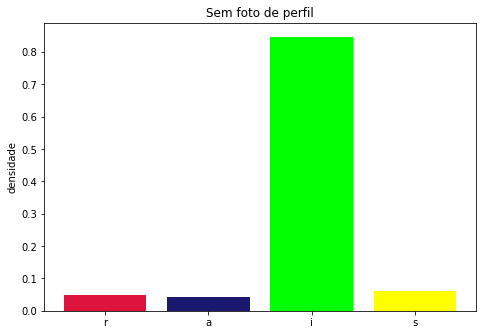

In [22]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
perfis = ['r', 'a', 'i', 's']
quantidade = [perfis_reais_sem_foto.shape[0]/perfis_sem_foto.shape[0], perfis_fake_ativo_sem_foto.shape[0]/perfis_sem_foto.shape[0], perfis_fake_inativo_sem_foto.shape[0]/perfis_sem_foto.shape[0], perfis_fake_spam_sem_foto.shape[0]/perfis_sem_foto.shape[0]]
ax.bar(perfis,quantidade,color=['crimson', 'midnightblue', 'lime', 'yellow'])
plt.title('Sem foto de perfil')
plt.ylabel('densidade')
plt.show()

A partir dos graficos, conclui-se que perfis sem disponibilidade de fotos tendem a serem classificados como fakes inativos,comportamento esperado já que fakes inativos." é uma classificação refetente a usuários que estão com a conta parada.Enquanto perfis com disponibilidade de fotos variam entre perfis de usuários ativos, fakes ativos e spam.

+ #### Relação Class e Disponibilidade de Link (LIN):

In [23]:
perfis_sem_link = data.loc[data['lin']== 0]
perfis_com_link= data.loc[data['lin']== 1]

perfis_reais_com_link = perfis_com_link.loc[perfis_com_link['class']=='r']
perfis_fake_ativo_com_link = perfis_com_link.loc[perfis_com_link['class']=='a']
perfis_fake_inativo_com_link = perfis_com_link.loc[perfis_com_link['class']=='i']
perfis_fake_spam_com_link = perfis_com_link.loc[perfis_com_link['class']=='s']

perfis_reais_sem_link = perfis_sem_link.loc[perfis_sem_link['class']=='r']
perfis_fake_ativo_sem_link = perfis_sem_link.loc[perfis_sem_link['class']=='a']
perfis_fake_inativo_sem_link = perfis_sem_link.loc[perfis_sem_link['class']=='i']
perfis_fake_spam_sem_link = perfis_sem_link.loc[perfis_sem_link['class']=='s']

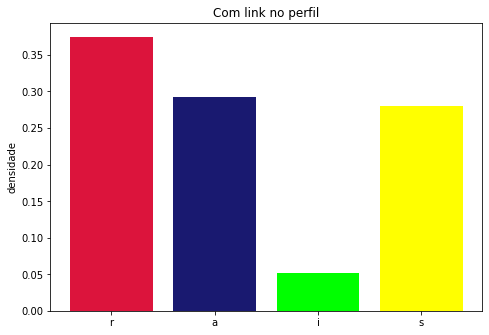

In [24]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
perfis = ['r', 'a', 'i', 's']
quantidade = [perfis_reais_com_link.shape[0]/perfis_com_link.shape[0], perfis_fake_ativo_com_link.shape[0]/perfis_com_link.shape[0], perfis_fake_inativo_com_link.shape[0]/perfis_com_link.shape[0], perfis_fake_spam_com_link.shape[0]/perfis_com_link.shape[0]]
ax.bar(perfis,quantidade, color=['crimson', 'midnightblue', 'lime', 'yellow'])
plt.title('Com link no perfil')
plt.ylabel('densidade')
plt.show()

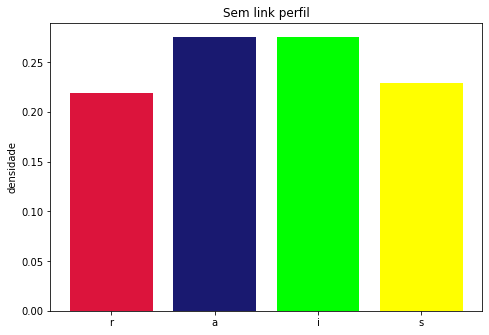

In [25]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
perfis = ['r', 'a', 'i', 's']
quantidade = [perfis_reais_sem_link.shape[0]/perfis_sem_link.shape[0], perfis_fake_ativo_sem_link.shape[0]/perfis_sem_link.shape[0], perfis_fake_inativo_sem_link.shape[0]/perfis_sem_link.shape[0], perfis_fake_spam_sem_link.shape[0]/perfis_sem_link.shape[0]]
ax.bar(perfis,quantidade, color=['crimson', 'midnightblue', 'lime', 'yellow'])
plt.title('Sem link perfil')
plt.ylabel('densidade')
plt.show()

A partir dos gráficos, nota-se que perfis que não possuem links tendem a estarem associados a perfis de fakes inativos, comportamento esperado pela característica da classificação de serem contas não mais acessadas. Enquanto perfis que possuem links tendem a estarem associados a usuários fakes ativos, spam e usuários reais (majoritariamente). Apesar disso, nota-se que a distribuição de quantidade de perfis em relação a ausência de links não será de muita ajuda na classificação, visto que não possuir links não é um comportamento específico de nenhuma das classificações.

+ #### Relação Class e Tamanho médio da Legenda	(CL):

<Figure size 1800x1800 with 0 Axes>

<Figure size 1800x1800 with 0 Axes>

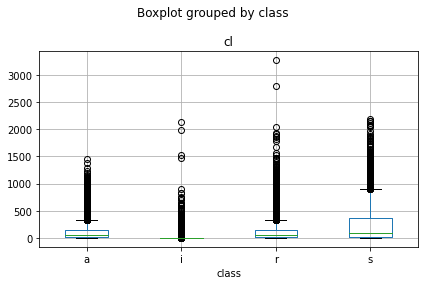

In [26]:
box_plot('cl')

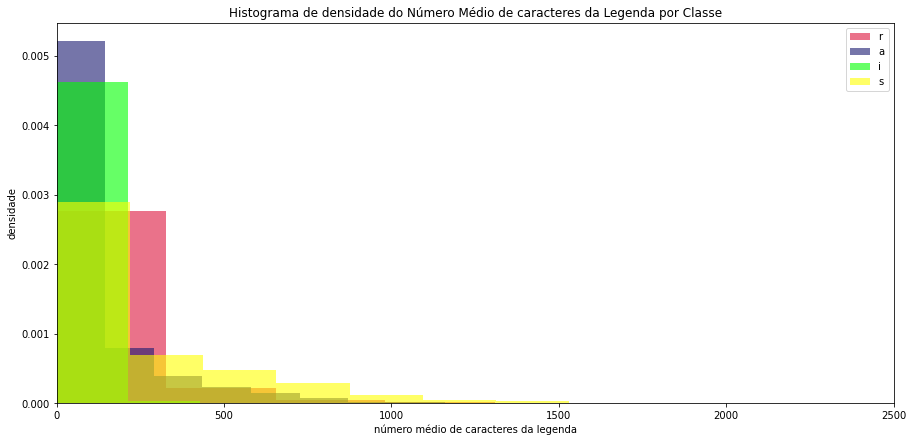

In [27]:
histograma('cl','número médio de caracteres da legenda','densidade','Histograma de densidade do Número Médio de caracteres da Legenda por Classe',(0,2500))

A partir do gráfico, conclui-se que todas as classificações possuem um número médio de caracteres próximo, porém a classificação spam tende a ter um número de caracteres mais alto, comportamento que se justifica na caractéristica de usuários "spam" ligada a propagação de informação em massa.

+ #### Relação Class e Legenda Zero	(CZ):

<Figure size 1800x1800 with 0 Axes>

<Figure size 1800x1800 with 0 Axes>

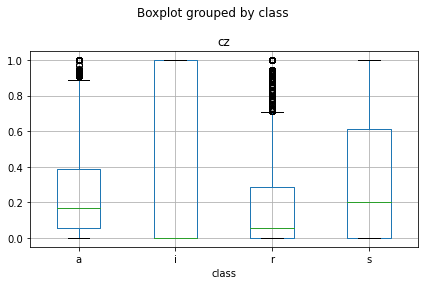

In [28]:
box_plot('cz')

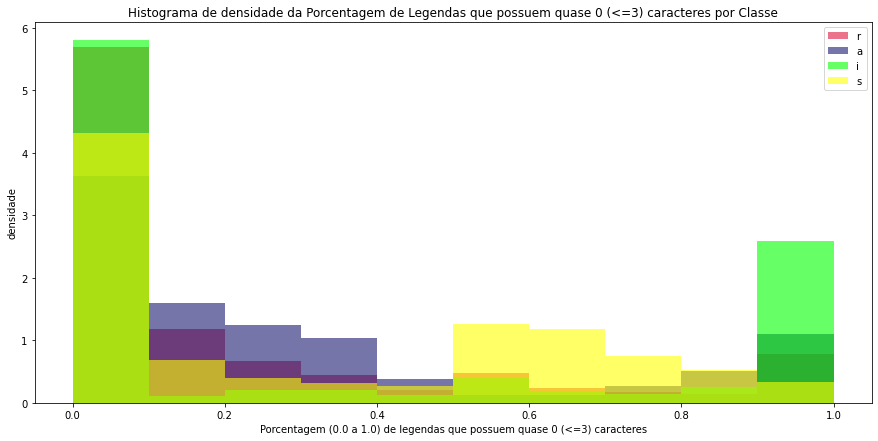

In [29]:
histograma('cz','Porcentagem (0.0 a 1.0) de legendas que possuem quase 0 (<=3) caracteres','densidade','Histograma de densidade da Porcentagem de Legendas que possuem quase 0 (<=3) caracteres por Classe')

A partir do gráfico, conclui-se que usuários ativos tendem a ter menos legenda zero, devido a atividade do usuário na rede  característica de sua classificação, entretanto, podemos observar sua presença nos extremos próximos de 1 da legenda zero, correpondente a "outliers". Ainda, observa-se que a mediana de usuários reais indica a alta presença de legendas (exceto por pontos outliers concentrados próximos a 1). Por fim, usuários spam possuem a maior mediana, ou seja, tendem mais a não ter legenda e usuários inativos encontram-se distribuídos ao longo do parâmetro, ou seja, não é uma feature que ajude a determinar este tipo de classificação.

+ #### Relação Class e Porcentagem Sem Imagem (NI)

<Figure size 1800x1800 with 0 Axes>

<Figure size 1800x1800 with 0 Axes>

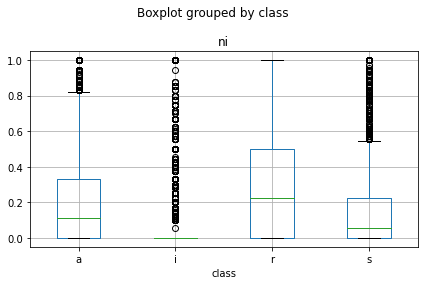

In [30]:
box_plot('ni')

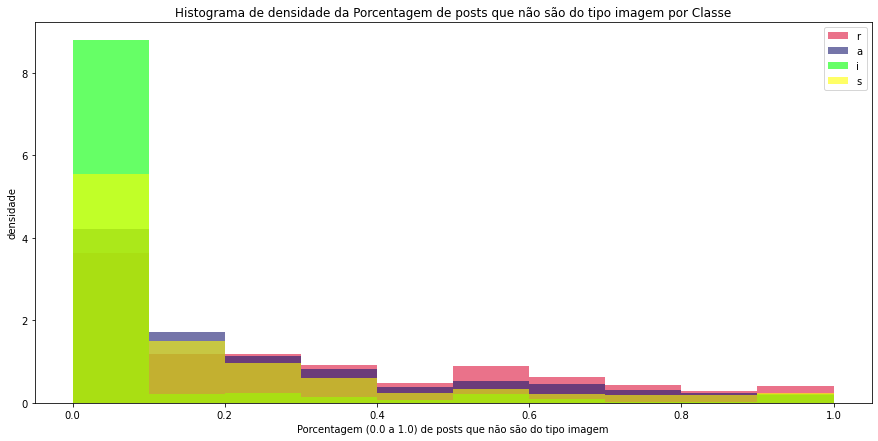

In [31]:
histograma('ni','Porcentagem (0.0 a 1.0) de posts que não são do tipo imagem','densidade','Histograma de densidade da Porcentagem de posts que não são do tipo imagem por Classe')

Analisando o primeiro gráfico e o histograma a respeito da _feature_ de porcentagem de posts que não são tipo imagem (NI) percebe-se que essa variável tem comportamento semelhante para todos os tipos de perfil, no entanto perfis fakes inativos tem uma característica discrepante que é uma mediana igual a 0.

+ #### Relação Class e Taxa de Engajamento (ERL-_Likes_):

<Figure size 1800x1800 with 0 Axes>

<Figure size 1800x1800 with 0 Axes>

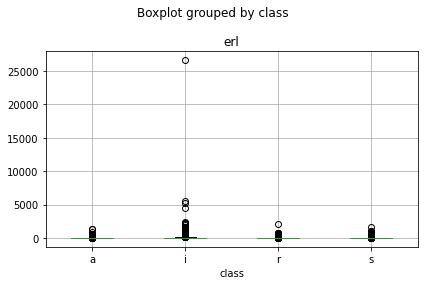

In [32]:
box_plot('erl')

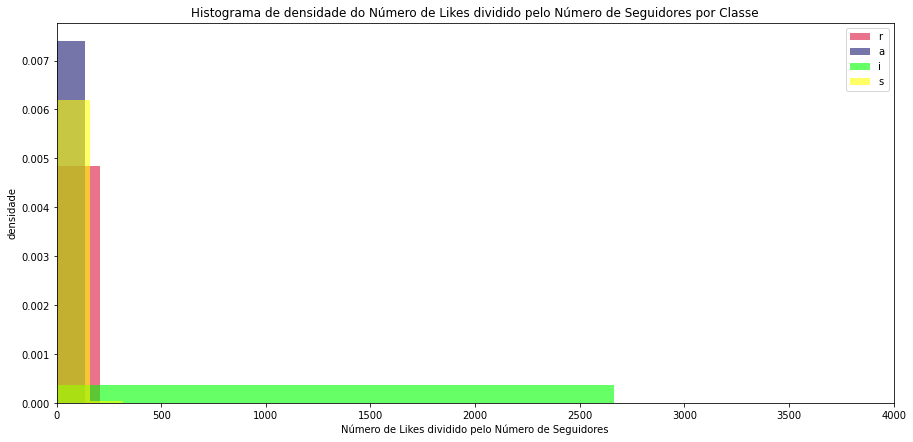

In [33]:
histograma('erl','Número de Likes dividido pelo Número de Seguidores','densidade','Histograma de densidade do Número de Likes dividido pelo Número de Seguidores por Classe',(0,4000))

A _feature_ Taxa de Engajamento em Likes (ERL) não parece ser um elemento decisivo na classificação, dada a proximidade de suas medianas observadas no primeiro gráfico. Apesar disso, observando o histograma fica claro que há certa diferença de concentração entre as classificações, porém nada muito decisivo por se tratarem de _outliers_.

+ #### Relação Class e Taxa de Engajamento (ERC-_Comentários_):	

<Figure size 1800x1800 with 0 Axes>

<Figure size 1800x1800 with 0 Axes>

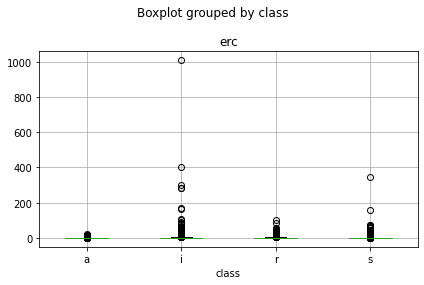

In [34]:
box_plot('erc')

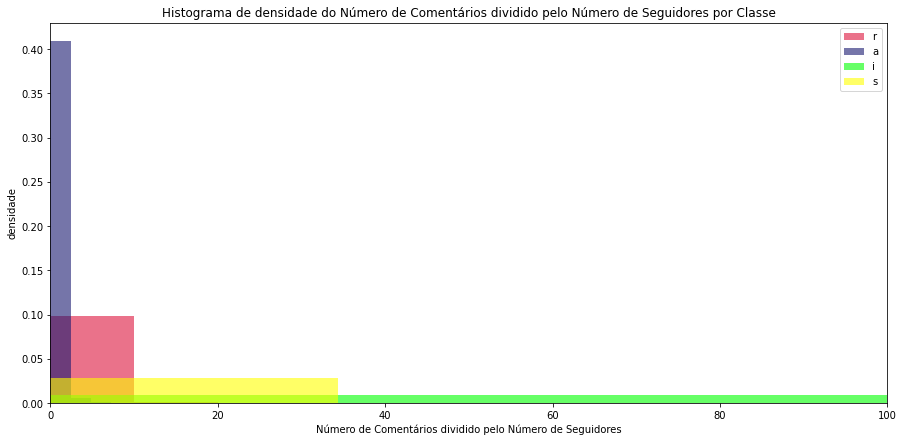

In [35]:
histograma('erc','Número de Comentários dividido pelo Número de Seguidores','densidade','Histograma de densidade do Número de Comentários dividido pelo Número de Seguidores por Classe',(0,100))

A _feature_ Taxa de Engajamento em Comentários (ERC) não parece ser um elemento decisivo na classificação, dada a proximidade de suas medianas observadas no primeiro gráfico. Apesar disso, observando o histograma fica claro que há certa diferença de concentração entre as classificações, porém nada muito decisivo por se tratarem de _outliers_.

+ #### Relação Class e Porcentagem de Localização (LT):

<Figure size 1800x1800 with 0 Axes>

<Figure size 1800x1800 with 0 Axes>

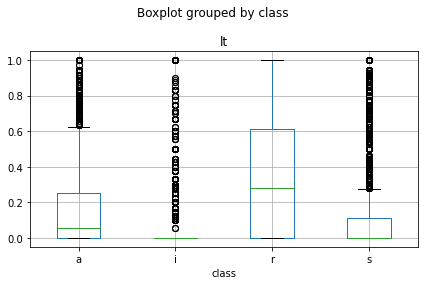

In [36]:
box_plot('lt')

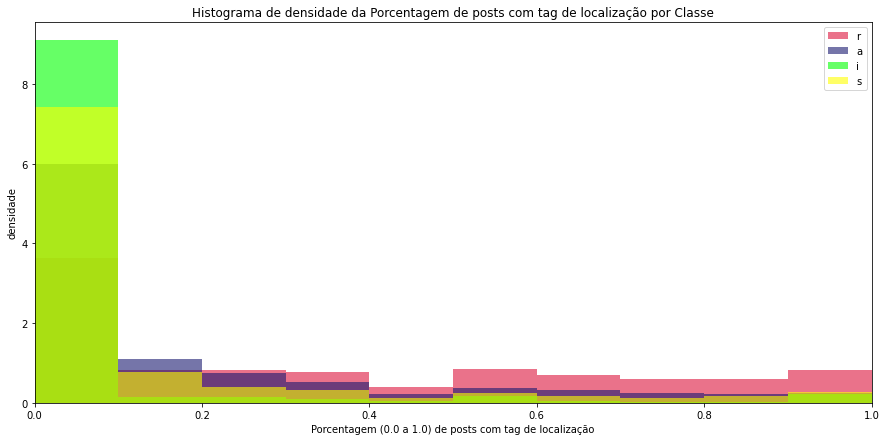

In [37]:
histograma('lt','Porcentagem (0.0 a 1.0) de posts com tag de localização','densidade','Histograma de densidade da Porcentagem de posts com tag de localização por Classe', (0,1))

A _feature_ Porcentagem de Localização (LT) parece ser um elemento decisivo na classificação, dado que a mediana observada no primeiro gráfico dos perfis reais é significativamente maior do que os perfis fakes. Observa-se também que as medianas dos perfis fakes inativos e spams são iguais a 0%.

+ #### Relação Class e Média de uso de Hashtags	(HC):

<Figure size 1800x1800 with 0 Axes>

<Figure size 1800x1800 with 0 Axes>

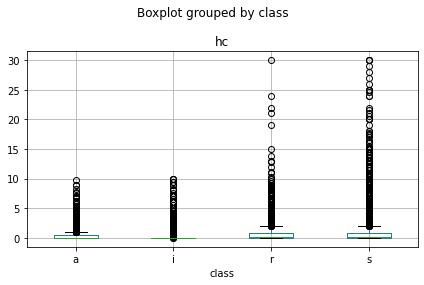

In [38]:
box_plot('hc')

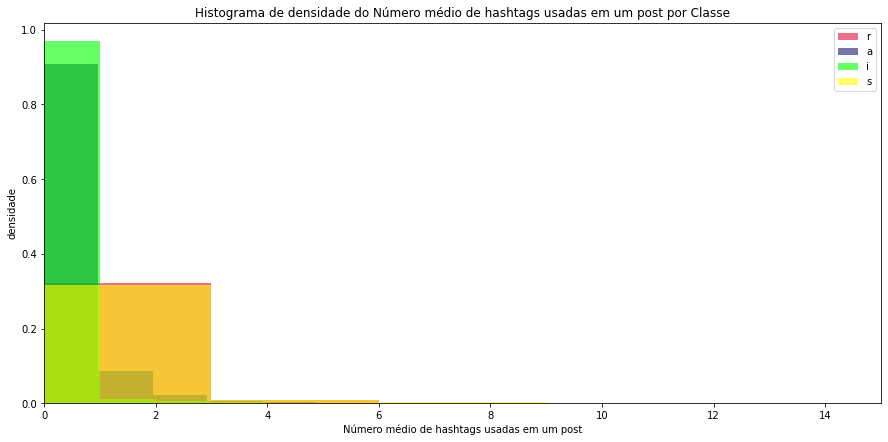

In [39]:
histograma('hc','Número médio de hashtags usadas em um post','densidade','Histograma de densidade do Número médio de hashtags usadas em um post por Classe',(0,15))

Sobre a média de uso de hashtags (HC) o primeiro gráfico indicam que há uma grande quantidade de _outiliers_ em todas as classificações. Talvez porque o uso ou não desse símbolo parta de uma decisão mais pessoal do usuário. Apesar disso vale destacar que pelo histograma observa-se um maior uso de hashtags pelas contas spam.

+ #### Relação Class e Palavras-Chave Promocionais (PR):

<Figure size 1800x1800 with 0 Axes>

<Figure size 1800x1800 with 0 Axes>

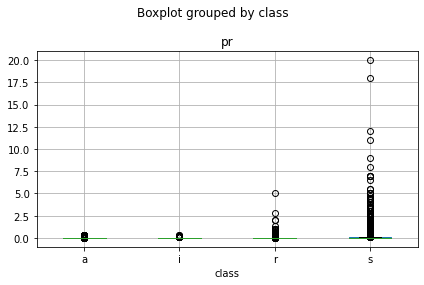

In [40]:
box_plot('pr')

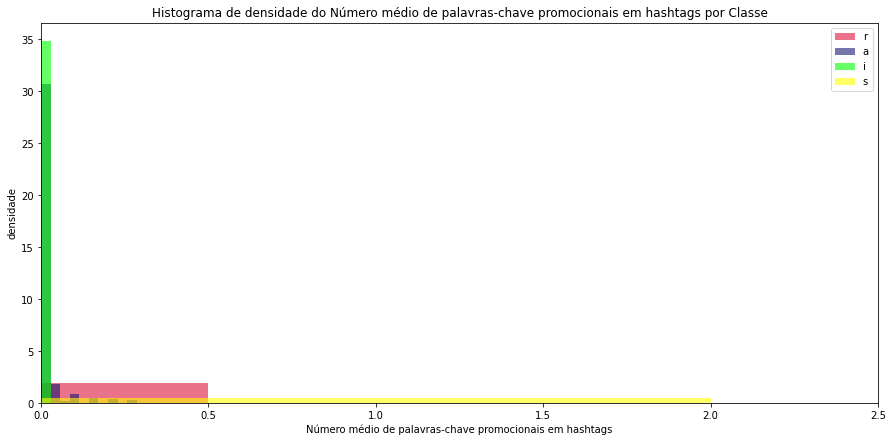

In [41]:
histograma('pr','Número médio de palavras-chave promocionais em hashtags','densidade','Histograma de densidade do Número médio de palavras-chave promocionais em hashtags por Classe',(0,2.5))

Sobre a _feature_ palavras-chave promocionais (PR) percebe-se pelo histograma que a grande maioria ocorre em contas spam; comportamento esperado por esse tipo de usuário. Além disso, vale distacar a quantidade de _outiliers_ nessa _feature_ verificada visualmente pelo primeiro gráfico; a coluna de pontos indica uma grande dispersão variada, o que talvez indique que essa variável não seja tão decisiva no momento da classificação.

+ #### Relação Class e Palavras-Chave Seguidores

<Figure size 1800x1800 with 0 Axes>

<Figure size 1800x1800 with 0 Axes>

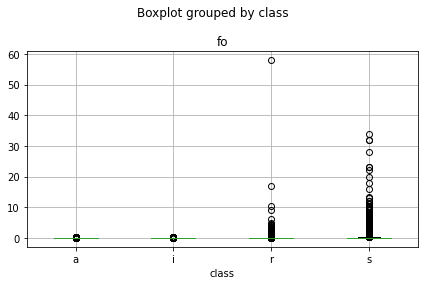

In [42]:
box_plot('fo')

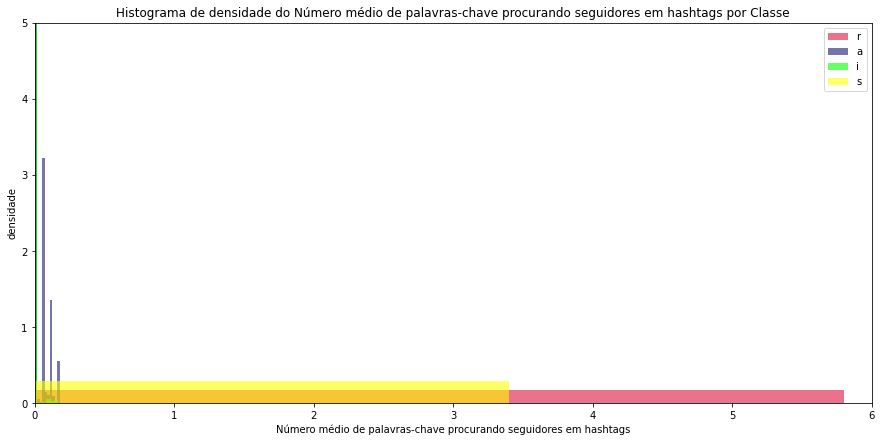

In [43]:
histograma('fo','Número médio de palavras-chave procurando seguidores em hashtags','densidade','Histograma de densidade do Número médio de palavras-chave procurando seguidores em hashtags por Classe',(0,6),(0,5))

Em relação à _feature_ palavras-chave seguidores (FO) percebe-se pelo histograma maior ocorrência em perfis ativos, abrangindo-se também para spams. Esse elemento também pode ser considerado uma importante _featrure_ para classificação visto que a rpocura por seguidores em rede sociais pode dizer muito sobre o estado de um usuário.

+ #### Relação Class e Similaridade por Cosseno (CS):

<Figure size 1800x1800 with 0 Axes>

<Figure size 1800x1800 with 0 Axes>

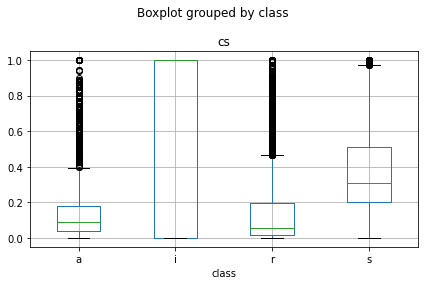

In [44]:
box_plot('cs')

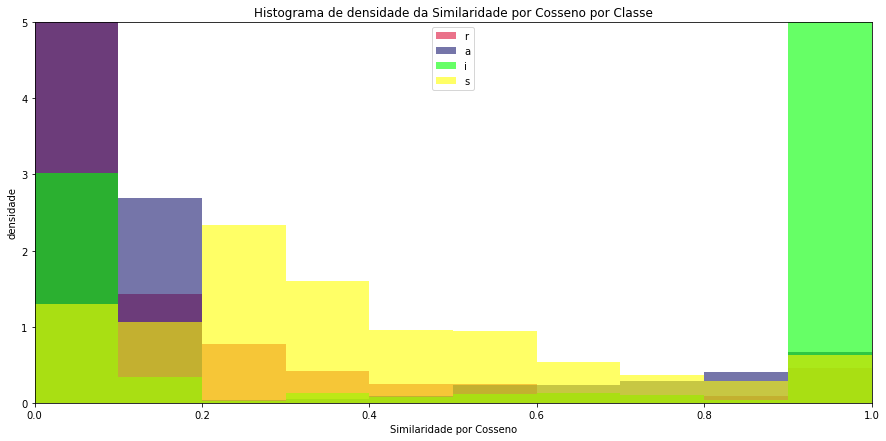

In [45]:
histograma('cs','Similaridade por Cosseno','densidade','Histograma de densidade da Similaridade por Cosseno por Classe',(0,1),(0,5))

+ #### Relação Class e Intervalo de Posts (PI):

<Figure size 1800x1800 with 0 Axes>

<Figure size 1800x1800 with 0 Axes>

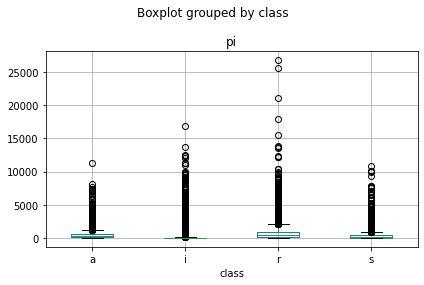

In [46]:
box_plot('pi')

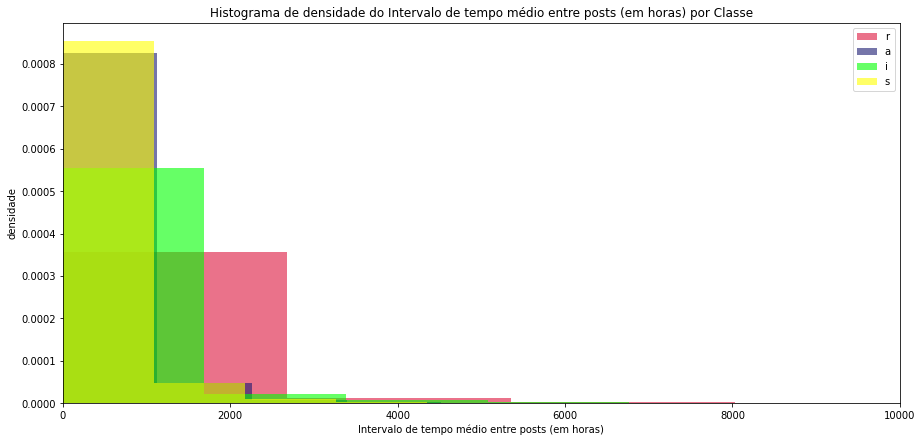

In [47]:
histograma('pi','Intervalo de tempo médio entre posts (em horas)','densidade','Histograma de densidade do Intervalo de tempo médio entre posts (em horas) por Classe',(0,10000))

Observando o histograma fica muito claro o comportamento dos usuários spam em relação ao intervalo entre posts (PI) quando comparado com os outros. Em paralelo, o usuário spam possui um intervalo de tempo entre publicações significament menores; um comportamento esperado desse tipo de usuário. Outro comportamento comprovado pelo histograma que também já era esperado é o longo intervalo entre posots por parte dos usuários inativos.

## C. Modelos de Predição 


## Preparação do Dataset

In [48]:
dataToTree = pd.read_csv('user_fake_authentic_4class.csv')

#Transformando os dados em um formato que a árvore de decisão possa entender (numérico)
labelencoder = LabelEncoder()
dataToTree['class'] = labelencoder.fit_transform(dataToTree['class'])
dataToTree['class'].value_counts()

# a -> 0, i -> 1, r -> 2, s -> 3

0    12054
1    10549
2    10441
3    10263
Name: class, dtype: int64

In [49]:
#Features 
x = dataToTree.drop("class", axis=1)
#Target
y = dataToTree["class"]

#Divisão do dataset em treino e teste 
Xtrain, Xval, Ytrain, Yval = train_test_split(x, y, test_size=0.5, random_state=0)

## K-Nearest Neighbors (KNNs)

Essa explicação foi baseada em um [artigo](#bibliografia) sobre o modelo de K-Nearest Neighbors (KNNs).  

O método de aprendizagem do KNNs consiste em verificar a similaridade dos dados entre si. Para verificar essa similaridade o processo consiste em medir a distância entre os dois dados apresentados: os dados não classificados e os dados utilizados no treinamento. Para calcular essa distância, o método utiliza qualquer cálculo geométrico que meça a distância entre dois pontos. 
 
Depois de calculada as distâncias entres os dados do item a ser classificado e os dados de treinamento, verifica-se onde estão classificados os dados que obtiveram as menores distâncias comparados com o treinamento, e entre elas a classificação mais recorrente é reproduzida para classificar o novo dado inserido. 

Abaixo segue uma explicação imagética do processo:

<img src=img/knn_exemplo.png>

Observa-se que _K_ nesse processo representa a quantidade de "vizinhos" observados. Para o caso de observar os dados de 3 vizinhos com as menores distâncias o item a ser classificado receberia a classificação "roxo". Porém quando expande-se a quantidade de vizinhos com as menores distâncias a serem levados em conta o item seria classificado como "amarelo", já que nesse caso há mais dados com a classe "amarelo" do que "roxo" na vizinhança de 6 dados.  

Desse modo, compreende-se o método KNNs: a classificação do item em questão leva em conta a distãncia entre N dados de treinamento e suas respectivas classes. Após verificados quais são os N dados com menores distâncias do item, a classe com maior recorrência entre eles é usada para classificar o item desejado.

#### Aplicação do modelo de K-Nearest Neighbors (KNNs) ao nosso Dataset com K=11:

In [50]:
knn11 = KNeighborsClassifier(n_neighbors=11)
knn11 = knn11.fit(Xtrain, Ytrain)

#### Aplicação do modelo de K-Nearest Neighbors (KNNs) ao nosso Dataset com K=4:

In [51]:
knn4 = KNeighborsClassifier(n_neighbors=4)
knn4 = knn4.fit(Xtrain, Ytrain)

## Decision Tree

A aprendizagem baseada em árvores de decisão é uma das abordagens de modelagem preditiva mais usadas em estatística e machine learning. Ela usa uma árvore de decisão como modelo preditivo para, a partir de observações sobre um item (representadas nos galhos) chegar em conclusões sobre o valor de uma variável target (representada nas folhas). O modelo funciona construindo um procedimento de perguntas de sim ou não a partir de certas características (features), para obter o target, que pode ser categórico ou numérico. Escolhemos essa abordagem por conta da simplicidade de sua implementação e de sua eficácia na predição de targets categóricos.
  


#### Como interpretar uma árvore como um modelo de predição  
Essa explicação foi baseada em um [artigo](#bibliografia) sobre o modelo de Decision Tree.  

A estrutura de árvore pode ser entendida por meio dos conceitos de ramos, nós, sub-árvores e folhas, como na imagem abaixo:

<img src=img/exemplo_arvore.png>

Os círculos roxos são chamados de nós e as linhas pretas que os ligam, de ramos. Os nós que não tem descendentes (com borda laranja na imagem) são chamados de folhas e o primeiro nó (com borda verde) é chamado de raiz. Juntos, os nós e ramos formam uma árvore.
  
A raiz representa o dataset inteiro e cada ramo representa uma decisão. O número total de perguntas feitas nesse processo é chamado de profundidade (ou altura) dessa árvore. No caso da figura acima, temos uma árvore de profundidade 3: precisamos de 3 ramos (3 perguntas) para ir da raiz até as folhas.

#### Aplicação do modelo de Decision Tree ao nosso Dataset  
Escolhemos também uma profundidade de 3 ramos em nossa árvore:

In [52]:
dt = tree.DecisionTreeClassifier(max_depth=3,random_state=0)
decision_tree = dt.fit(Xtrain, Ytrain)

#### Visualização da Árvore

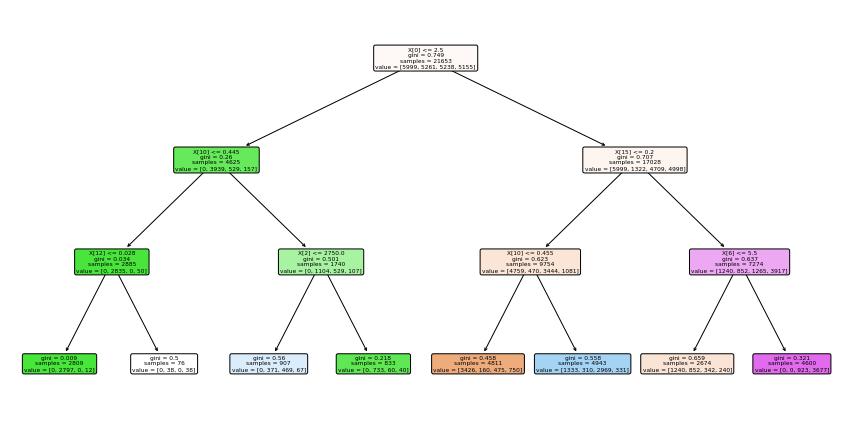

In [53]:
plt.figure(figsize=(15,7.5))
plot_tree(dt,filled=True,rounded=True);

## Random Forest

Essa explicação foi baseada em um [artigo](#bibliografia) sobre o modelo de Random Forest.  
  
O método de Random Forest funciona basicamente de modo que ao invés de criar uma única árvore de decisão com todas as features ao mesmo tempo ele cria pequenas árvores de decisão a partir de algumas features aleatórias.  
No final, é feita uma "votação" a partir dos valores retornados por cada árvore, de forma que cada mini árvore toma uma decisão a partir dos dados apresentados. A decisão mais votada é a resposta do algoritmo.

<img src=img/exemplo_random.png>

Escolhemos essa abordagem por se tratar da evolução natural do método de Decision Tree aplicado anteriormente. Random Forests são populares por apresentarem bons resultados em diversos tipos de problema, tanto de regressão (ex.: prever valor de uma casa) quanto de classificação (e-mail é spam ou não é spam).

  

#### Aplicação do modelo de Random Forest ao nosso Dataset:

In [54]:
trees = RandomForestClassifier(n_estimators=1000,random_state=0, n_jobs=-1)
trees = trees.fit(Xtrain, Ytrain)

## D. Processo e Estatísticas de Validação

### Score
Pontuação de 0 a 1 referente a acurácia de classificação (função da biblioteca sklearn)

In [55]:
print('Score para o modelo de Decision Tree')
print(f'Score na base de treinamento: {decision_tree.score(Xtrain, Ytrain)}')
print(f'Score na base de teste: {decision_tree.score(Xval, Yval)}')
print('\n')
print('Score para o modelo de Random Forest')
print(f'Score na base de treinamento: {trees.score(Xtrain, Ytrain)}')
print(f'Score na base de teste: {trees.score(Xval, Yval)}')
print('\n')
print('Score para o modelo de K-Nearest Neighbors K=11 (KNNs)')
print(f'Score na base de treinamento: {knn11.score(Xtrain, Ytrain)}')
print(f'Score na base de teste: {knn11.score(Xval, Yval)}')
print('\n')
print('Score para o modelo de K-Nearest Neighbors K=4 (KNNs)')
print(f'Score na base de treinamento: {knn4.score(Xtrain, Ytrain)}')
print(f'Score na base de teste: {knn4.score(Xval, Yval)}')

Score para o modelo de Decision Tree
Score na base de treinamento: 0.7088625132776059
Score na base de teste: 0.7052276715618362


Score para o modelo de Random Forest
Score na base de treinamento: 1.0
Score na base de teste: 0.9044518333795142


Score para o modelo de K-Nearest Neighbors K=11 (KNNs)
Score na base de treinamento: 0.6408349882233408
Score na base de teste: 0.575459499399649


Score para o modelo de K-Nearest Neighbors K=4 (KNNs)
Score na base de treinamento: 0.7076155728998291
Score na base de teste: 0.5519534497090607


### Matriz de Confusão

Essa explicação foi baseada em um [artigo](#bibliografia) sobre métricas de machine learning
Uma matriz de confusão é uma métrica voltada para modelos de classificação.  
Ela funciona como uma crosstab entre o valor previsto pelo modelo e o modelo real da base, permitindo calcular a quantidade de falso positivo e falso negativo; e de verdadeiro positivo e verdadeiro negativo, além de te fornecer a acurácia e sensibilidade. 
  
Quando o modelo prevê um caso positivo corretamente, nós temos um caso de Verdadeiro Positivo (True Positive - TP); caso o seu modelo diga que é uma classificação, quando na verdade não é, nós temos um caso de Falso Positivo (False Positive - FP), também conhecido como Type I Error.
  
O oposto também pode ocorrer. Quando o modelo diz que não é uma classificação, mas na verdade é, temos um caso de Falso Negativo (FN), também conhecido como Type II Error; e quando ele diz que não é uma classificação, e ele está certo, ocorre o Verdadeiro Negativo (TN).

## Métricas da Matriz de Confusão 

### Acurácia

Proporção de casos que foram corretamente previstos, sejam eles verdadeiro positivo ou verdadeiro negativo.  
Acurácia = (TP + TN) / (TP + TN + FP + FN)


In [56]:
def acuracia(matriz):
    acuracia = np.sum(np.diag(matriz)) / np.sum(matriz)
    return acuracia

### Sensibilidade / Recall

Proporção de casos positivos que foram identificados corretamente.  
Recall = TP / TP + FN

In [57]:
def recall(matriz):
    recall = np.diag(matriz) / np.sum(matriz, axis = 1)
    return recall   

### Precision

Proporção de casos positivos com casos que foram previstos como positivos.  
Precision = TP / TP + FP

In [58]:
def precision(matriz):
    precision = np.diag(matriz) / np.sum(matriz, axis = 0)
    return precision

## Aplicação da Matriz e Métricas

### K-Nearest Neighbors K=11 (KNNs)

In [59]:
#Predição de valores pelo modelo de K-Nearest Neighbors K=11 (KNNs)
Y_pred_knn11 = knn11.predict(Xval)
matriz_confusao_knn11 = confusion_matrix(Yval, Y_pred_knn11)
print(matriz_confusao_knn11)

[[3536  498 1029  992]
 [ 525 4246  349  168]
 [1267  464 3026  446]
 [2127  611  717 1653]]


In [60]:
fig = px.imshow(matriz_confusao_knn11, labels=dict(x="Y previsto", y="Y verdadeiro", color="Quantidade"),  x = ['a', 'i', 'r', 's'], y = ['a', 'i', 'r', 's'], title = 'Matriz de Confusão para o modelo de K-Nearest Neighbors K=11 (KNNs)')
fig.show()

In [61]:
acuracia_knn11 =  acuracia(matriz_confusao_knn11)
recall_knn11 =  recall(matriz_confusao_knn11)
precision_knn11 =  precision(matriz_confusao_knn11)

In [62]:
print(f'A acurácia do modelo de K-Nearest Neighbors K=11 (KNNs) é {acuracia_knn11*100}%')
print('\n')
print(f'A recall do modelo de K-Nearest Neighbors K=11 (KNNs) é:')
print(f'{recall_knn11[0]*100}% para as contas tipo "a"')
print(f'{recall_knn11[1]*100}% para as contas tipo "i"')
print(f'{recall_knn11[2]*100}% para as contas tipo "r"')
print(f'{recall_knn11[3]*100}% para as contas tipo "s"')
print('\n')
print(f'A precision do modelo de K-Nearest Neighbors K=11 (KNNs) é:')
print(f'{precision_knn11[0]*100}% para as contas tipo "a"')
print(f'{precision_knn11[1]*100}% para as contas tipo "i"')
print(f'{precision_knn11[2]*100}% para as contas tipo "r"')
print(f'{precision_knn11[3]*100}% para as contas tipo "s"')

A acurácia do modelo de K-Nearest Neighbors K=11 (KNNs) é 57.5459499399649%


A recall do modelo de K-Nearest Neighbors K=11 (KNNs) é:
58.39801816680429% para as contas tipo "a"
80.29500756429651% para as contas tipo "i"
58.15875456467423% para as contas tipo "r"
32.36100234925607% para as contas tipo "s"


A precision do modelo de K-Nearest Neighbors K=11 (KNNs) é:
47.43125419181757% para as contas tipo "a"
72.96786389413988% para as contas tipo "i"
59.09002148017966% para as contas tipo "r"
50.72108008591593% para as contas tipo "s"


### K-Nearest Neighbors K=4 (KNNs)

In [63]:
#Predição de valores pelo modelo de K-Nearest Neighbors K=4 (KNNs)
Y_pred_knn4 = knn4.predict(Xval)
matriz_confusao_knn4 = confusion_matrix(Yval, Y_pred_knn4)
print(matriz_confusao_knn4)

[[3438  478 1050 1089]
 [ 536 4169  352  231]
 [1512  471 2749  471]
 [2187  558  767 1596]]


In [64]:
fig = px.imshow(matriz_confusao_knn4, labels=dict(x="Y previsto", y="Y verdadeiro", color="Quantidade"),  x = ['a', 'i', 'r', 's'], y = ['a', 'i', 'r', 's'], title = 'Matriz de Confusão para o modelo de K-Nearest Neighbors K=4(KNNs)')
fig.show()

In [65]:
acuracia_knn4 =  acuracia(matriz_confusao_knn4)
recall_knn4 =  recall(matriz_confusao_knn4)
precision_knn4 =  precision(matriz_confusao_knn4)

In [66]:
print(f'A acurácia do modelo de K-Nearest Neighbors K=4 (KNNs) é {acuracia_knn4*100}%')
print('\n')
print(f'A recall do modelo de K-Nearest Neighbors K=4 (KNNs) é:')
print(f'{recall_knn4[0]*100}% para as contas tipo "a"')
print(f'{recall_knn4[1]*100}% para as contas tipo "i"')
print(f'{recall_knn4[2]*100}% para as contas tipo "r"')
print(f'{recall_knn4[3]*100}% para as contas tipo "s"')
print('\n')
print(f'A precision do modelo de K-Nearest Neighbors K=4 (KNNs) é:')
print(f'{precision_knn4[0]*100}% para as contas tipo "a"')
print(f'{precision_knn4[1]*100}% para as contas tipo "i"')
print(f'{precision_knn4[2]*100}% para as contas tipo "r"')
print(f'{precision_knn4[3]*100}% para as contas tipo "s"')

A acurácia do modelo de K-Nearest Neighbors K=4 (KNNs) é 55.19534497090607%


A recall do modelo de K-Nearest Neighbors K=4 (KNNs) é:
56.7795210569777% para as contas tipo "a"
78.83888048411498% para as contas tipo "i"
52.83490294061119% para as contas tipo "r"
31.245105716523103% para as contas tipo "s"


A precision do modelo de K-Nearest Neighbors K=4 (KNNs) é:
44.80646422520527% para as contas tipo "a"
73.44961240310077% para as contas tipo "i"
55.896705978039854% para as contas tipo "r"
47.12134632418069% para as contas tipo "s"


### Decision Tree

In [67]:
#Predição de valores pelo modelo de Decision Tree
Y_pred_decision = decision_tree.predict(Xval)
matriz_confusao_decision = confusion_matrix(Yval, Y_pred_decision)
print(matriz_confusao_decision)

[[4674    0 1381    0]
 [ 954 3537  797    0]
 [ 795   70 3473  865]
 [ 979  112  430 3587]]


In [68]:
fig = px.imshow(matriz_confusao_decision, labels=dict(x="Y previsto", y="Y verdadeiro", color="Quantidade"), x = ['a', 'i', 'r', 's'], y = ['a', 'i', 'r', 's'], title = 'Matriz de Confusão para o modelo de Decision Tree')
fig.show()

In [69]:
acuracia_decision_tree =  acuracia(matriz_confusao_decision)
recall_decision_tree =  recall(matriz_confusao_decision)
precision_decision_tree =  precision(matriz_confusao_decision)

In [70]:
print(f'A acurácia do modelo de Decision Tree é {acuracia_decision_tree*100}%')
print('\n')
print(f'A recall do modelo de Decision Tree é:')
print(f'{recall_decision_tree[0]*100}% para as contas tipo "a"')
print(f'{recall_decision_tree[1]*100}% para as contas tipo "i"')
print(f'{recall_decision_tree[2]*100}% para as contas tipo "r"')
print(f'{recall_decision_tree[3]*100}% para as contas tipo "s"')
print('\n')
print(f'A precision do modelo de Decision Tree é:')
print(f'{precision_decision_tree[0]*100}% para as contas tipo "a"')
print(f'{precision_decision_tree[1]*100}% para as contas tipo "i"')
print(f'{precision_decision_tree[2]*100}% para as contas tipo "r"')
print(f'{precision_decision_tree[3]*100}% para as contas tipo "s"')


A acurácia do modelo de Decision Tree é 70.52276715618362%


A recall do modelo de Decision Tree é:
77.19240297274979% para as contas tipo "a"
66.88729198184569% para as contas tipo "i"
66.74995195079761% para as contas tipo "r"
70.22317932654659% para as contas tipo "s"


A precision do modelo de Decision Tree é:
63.14509592002162% para as contas tipo "a"
95.10621134713632% para as contas tipo "i"
57.11231705311627% para as contas tipo "r"
80.57053009883198% para as contas tipo "s"


### Random Forest

In [71]:
#Predição de valores pelo modelo de Random Forest
Y_pred_trees = trees.predict(Xval)
matriz_confusao_trees = confusion_matrix(Yval, Y_pred_trees)
print(matriz_confusao_trees)

[[5604    4  447    0]
 [   2 5000  285    1]
 [ 415  287 4055  446]
 [  12    6  164 4926]]


In [72]:
fig = px.imshow(matriz_confusao_trees, labels=dict(x="Y previsto", y="Y verdadeiro", color="Quantidade"),  x = ['a', 'i', 'r', 's'], y = ['a', 'i', 'r', 's'], title = 'Matriz de Confusão para o modelo de Random Forest')
fig.show()

In [73]:
acuracia_random_forest =  acuracia(matriz_confusao_trees)
recall_random_forest =  recall(matriz_confusao_trees)
precision_random_forest =  precision(matriz_confusao_trees)

In [74]:

print(f'A acurácia do modelo de Random Forest é {acuracia_random_forest*100}%')
print('\n')
print(f'A recall do modelo de Random Forest é:')
print(f'{recall_random_forest[0]*100}% para as contas tipo "a"')
print(f'{recall_random_forest[1]*100}% para as contas tipo "i"')
print(f'{recall_random_forest[2]*100}% para as contas tipo "r"')
print(f'{recall_random_forest[3]*100}% para as contas tipo "s"')
print('\n')
print(f'A precision do modelo de Random Forest é:')
print(f'{precision_random_forest[0]*100}% para as contas tipo "a"')
print(f'{precision_random_forest[1]*100}% para as contas tipo "i"')
print(f'{precision_random_forest[2]*100}% para as contas tipo "r"')
print(f'{precision_random_forest[3]*100}% para as contas tipo "s"')


A acurácia do modelo de Random Forest é 90.44518333795142%


A recall do modelo de Random Forest é:
92.55161023947151% para as contas tipo "a"
94.55370650529501% para as contas tipo "i"
77.935806265616% para as contas tipo "r"
96.43696162881754% para as contas tipo "s"


A precision do modelo de Random Forest é:
92.88910989557434% para as contas tipo "a"
94.39305267132339% para as contas tipo "i"
81.90264593011513% para as contas tipo "r"
91.68062534896706% para as contas tipo "s"


## Comparação de métricas

In [75]:
d2 = {'': ['Acurácia/Score', 'Sensibilidade/Recall para as classes:', 'a', 'i', 'r', 's','Precision para as classes:', 'a', 'i', 'r', 's'], 'KNN: K=11': [acuracia_knn11, '', recall_knn11[0], recall_knn11[1], recall_knn11[2], recall_knn11[3], '', precision_knn11[0], precision_knn11[1], precision_knn11[2], precision_knn11[3]],'KNN: K=4': [acuracia_knn4, '', recall_knn4[0], recall_knn4[1], recall_knn4[2], recall_knn4[3], '', precision_knn4[0], precision_knn4[1], precision_knn4[2], precision_knn4[3]], 'Decision Tree': [acuracia_decision_tree, '', recall_decision_tree[0], recall_decision_tree[1], recall_decision_tree[2], recall_decision_tree[3], '', precision_decision_tree[0], precision_decision_tree[1], precision_decision_tree[2], precision_decision_tree[3]], 'Random Forest': [acuracia_random_forest, '', recall_random_forest[0], recall_random_forest[1], recall_random_forest[2], recall_random_forest[3], '', precision_random_forest[0], precision_random_forest[1], precision_random_forest[2], precision_random_forest[3]]}
df2 = pd.DataFrame(data=d2)
pd.set_option('display.max_colwidth', None)
df2.style.hide_index()

,KNN: K=11,KNN: K=4,Decision Tree,Random Forest
Acurácia/Score,0.575459,0.551953,0.705228,0.904452
Sensibilidade/Recall para as classes:,,,,
a,0.583980,0.567795,0.771924,0.925516
i,0.802950,0.788389,0.668873,0.945537
r,0.581588,0.528349,0.667500,0.779358
s,0.323610,0.312451,0.702232,0.964370
Precision para as classes:,,,,
a,0.474313,0.448065,0.631451,0.928891
i,0.729679,0.734496,0.951062,0.943931
r,0.590900,0.558967,0.571123,0.819026


## Cross Validation Score

A Cross Validation Score é um método de avaliação da acurácia do modelo aplicado ao dataset estudada nesse [artigo](#bibliografia). Essa técnica conta com um algoritmo chamado _K-Fold_ que fragmenta aleatóriamente a base de treino, treianndo e avaliando mais uma vez "K" vezes as _folds_. Cada um dos _folds_ representa um oequeno modelo do dataset que é submetido a avaliações e previsões. Este algoritmo retorna uma lista de resultados referentes à acurácia da aplicação do modelo.  

A partir da divisão randomica do dataset múltiplas vezes pode-se ter maior certeza sobre a acurácia do modelo.

### CV KNN11

In [76]:
cv_knn11 = cross_val_score(knn11, Xval, Yval, cv = 10)
media_cv_knn11 = cv_knn11.mean()
std_cv_knn11 = cv_knn11.std()
print(f'A acurácia média do modelo de K-Nearest Neighbors K=11 (KNNs) é {media_cv_knn11*100}%')
print(f'A acurácia desvio padrão do modelo de K-Nearest Neighbors K=11 (KNNs) é {std_cv_knn11*100}')

A acurácia média do modelo de K-Nearest Neighbors K=11 (KNNs) é 56.92253789938564%
A acurácia desvio padrão do modelo de K-Nearest Neighbors K=11 (KNNs) é 1.0925541942944599


### CV KNN4

In [77]:
cv_knn4 = cross_val_score(knn4, Xval, Yval, cv = 10)
media_cv_knn4 = cv_knn4.mean()
std_cv_knn4 = cv_knn4.std()
print(f'A acurácia média do modelo de K-Nearest Neighbors K=4 (KNNs) é {media_cv_knn4*100}%')
print(f'A acurácia desvio padrão do modelo de K-Nearest Neighbors K=4 (KNNs) é {std_cv_knn4*100}')

A acurácia média do modelo de K-Nearest Neighbors K=4 (KNNs) é 54.604270491471176%
A acurácia desvio padrão do modelo de K-Nearest Neighbors K=4 (KNNs) é 0.6295585565439649


### CV Decision Tree

In [78]:
cv_decision = cross_val_score(decision_tree, Xval, Yval, cv = 10)
media_cv_decision = cv_decision.mean()
std_cv_decision = cv_decision.std()
print(f'A acurácia média do modelo de Decision Tree é {media_cv_decision*100}%')
print(f'A acurácia desvio padrão do modelo de Decision Tree é {std_cv_decision*100}')

A acurácia média do modelo de Decision Tree é 71.49237320845569%
A acurácia desvio padrão do modelo de Decision Tree é 1.5250890471775047


### CV Random Forest

In [79]:
cv_forest = cross_val_score(trees, Xval, Yval, cv = 10)
media_cv_forest = cv_forest.mean()
std_cv_forest = cv_forest.std()
print(f'A acurácia média do modelo de Random Forest é {media_cv_forest*100}%')
print(f'A acurácia desvio padrão do modelo de Random Forest é {std_cv_forest*100}')

A acurácia média do modelo de Random Forest é 90.07111799189232%
A acurácia desvio padrão do modelo de Random Forest é 0.41043499051942967


##  Conclusão  
    

#### Conclusões Análise Exploratória

Na análise exploratória examinamos os dados com foco na relação entre features e features com os possíveis targets.Assim, obtivemos um entendimento básico entre dados e comportamentos de variáveis. Ainda, percebemos que a correlação entre as features atinge no máximo o nível moderado, ou seja, cada uma delas tem um papel na análise predictiva da base dados e nenhuma possue correlação alta suficiente para ser descartada.

#### Conclusões Análise dos modelos Predictivos
##### KNN's
Em uma análise inicial buscamos prever resultados a partir do modelo KNNs, que classifica novos dados com base em uma medida de similaridade entre seus “vizinhos” mais próximos, ou seja, aqueles que têm características semelhantes às suas. A partir deste, obtivemos uma acurácia na base de testes de aproximadamente 57%, o qual apesar de ser um valor acima da escolha aleatória (25%) incentivou a busca por outros modelos que fossem mais eficazes. 
##### Decision Tree
O segundo modelo implementado foram as  árvores de Decisão, ou Decision Trees, algoritmos de machine learning largamente utilizados, com uma estrutura de simples compreensão e que costumam apresentar bons resultados em suas previsões. A decisão na escolha no modelo se baseou além da técnica mais robusta de construção, mas também do melhor comportamento de predição em relação a outliers em comparação ao KNN's, o qual  é extremamente sensível a outliers e,ainda, necessita de um valor ótimo de K, o qual nem sempre é fácil de ser encontrado.
Nesta previsão,pelo método Decion Trees, a acurácia do modelo foi de aproximadamente 70%.
##### Random Forest
O último modelo implementado foi o Random Forest Classifier, os algoritmos Random Forest são criados por várias árvores de decisão, geralmente treinados com o método de bagging, cuja ideia principal é que a combinação de modelos aumenta o resultado final. A decisão de implementar o metodo Random Forest está associado a ele  alavancar o poder de várias árvores de decisão e não depender da importância do recurso dada por uma única árvore de decisão.Ou seja, garante uma previsão com maior acurácia, a qual se comprova em nossos estudos já que obtivemos uma acurácia média de aproximadamente 90%. 

#### Proposta de Iteração
Apesar de 90% representar uma acurácia elevada, com alta precisão e baixo risco, traz-se à tona a possibilidade de aumentarmos tal valor, por meio do aumento de dados na base, o qual em situações de uso corporativo do modelo, por exemplo: pelo Instagram, seria uma solução altamente viável.

#### Considerações finais
Por fim, respondemos as perguntas iniciais considerando nossos resultados de forma positiva.Sim, é possível prever e classificar se usuários são fakes inativos, spam's, ativos ou até reais, a partir de uma base de dados e modelos preditivos que obtem uma alta acurácia de 90%, ou seja, com alta precisão e baixo risco.Dessa forma, há a possibilidade de revelar-se a realidade por trás de perfis do Instagram com segurança. Assim, nosso modelo torna-se altamente capaz de fazer tal prevenção e pode ajudar empresas a tomar decisões/ações em cima das classificações obtidas


## F. Referências Bibliográficas    

<div id="bibliografia"></div>  

- [Modelos de Predição | Decision Tree](https://medium.com/turing-talks/turing-talks-17-modelos-de-predição-decision-tree-610aa484cb05)
- [Random Forest: como funciona um dos algoritmos mais populares de ML](https://medium.com/cinthiabpessanha/random-forest-como-funciona-um-dos-algoritmos-mais-populares-de-ml-cc1b8a58b3b4)
- [Como saber se seu modelo de Machine Learning está funcionando mesmo](https://paulovasconcellos.com.br/como-saber-se-seu-modelo-de-machine-learning-está-funcionando-mesmo-a5892f6468b)
- [Taking the Confusion Out of Confusion Matrices](https://towardsdatascience.com/taking-the-confusion-out-of-confusion-matrices-c1ce054b3d3e)
- [KNN (K-Nearest Neighbors) #1](https://medium.com/brasil-ai/knn-k-nearest-neighbors-1-e140c82e9c4e)
- [Por que cross validation?](https://medium.com/cinthiabpessanha/por-que-cross-validation-b4f57007834a)
- [Um tour pelos 10 principais algoritmos de machine learning](https://ilumeo.com.br/todos-posts/2020/06/22/um-tour-pelos-10-principais-algoritmos-de-machine-learning)
- [Estudo comparativo de modelos de aprendizado de máquina para detecção de email spam](https://bdm.unb.br/bitstream/10483/27588/1/2020_NicolasMachadoSchumacher_tcc.pdf)
- [Decision Tree vs. Random Forest – Which Algorithm Should you Use?](https://www.analyticsvidhya.com/blog/2020/05/decision-tree-vs-random-forest-algorithm/)
- [Are Decision Trees Robust to Outliers](https://datascience.stackexchange.com/questions/37394/are-decision-trees-robust-to-outliers)
- [O que é acurácia?](https://blog.idwall.co/o-que-e-acuracia/)
